In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import scipy
import sklearn

%matplotlib inline

In [2]:
df = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')


In [3]:
data_train = df.loc[:, 'text']

y_train = df.loc[:, 'labels']

data_train.head()

0    Un-bleeping-believable! Meg Ryan doesn't even ...
1    This is a extremely well-made film. The acting...
2    Every once in a long while a movie will come a...
3    Name just says it all. I watched this movie wi...
4    This movie succeeds at being one of the most u...
Name: text, dtype: object

In [4]:
data_test = df_test.loc[:, 'text']

data_test.tail()

24995    More of a Frisbee like turtle with fangs that ...
24996    It really is a great film (after being able to...
24997    I see it when I was 12 year old and I dream to...
24998    This film is an absolute disgrace! I thoroughl...
24999    "Big Fat Liar" comes as a welcome -- shallow, ...
Name: text, dtype: object

In [5]:
import nltk
import string
import re
from collections import Counter

from nltk.corpus import stopwords

In [6]:
## For more info, see http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html

stemmer = nltk.stem.porter.PorterStemmer()

def get_tokens(inp_txt):
    
    ## Lower case: ABC -> abc
    txt_lower = inp_txt.lower()
  
    ## Remove punctuations (!, ', ", ., :, ;, )
    #txt_lower_nopunct = txt_lower.translate(string.maketrans("",""), string.punctuation)
    #print(txt_lower_nopunct)
    
    
    ## Tokenize:
    tokens = nltk.word_tokenize(txt_lower) #_nopunct)
    #tokens = nltk.wordpunct_tokenize(txt_lower)
    
    ## remove stop-words:
    tokens_filtered = [w for w in tokens if not w in stopwords.words('english')]
    
    ## stemming:
    stems = [stemmer.stem(t) for t in tokens_filtered]
    stems_nopunct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return (stems_nopunct)

In [7]:
get_tokens("What's in a name? That which we call a rose by any other name would smell as sweet.")

## Note: you need to download punkt package in nltk:
# import nltk
# nltk.download(punkt)

['name', 'call', 'rose', 'name', 'would', 'smell', 'sweet']

In [8]:
tfidf = sklearn.feature_extraction.text.TfidfVectorizer(
    encoding = 'utf-8',
    decode_error = 'replace',
    strip_accents = 'ascii',
    analyzer = 'word',
    smooth_idf = True,
    tokenizer = get_tokens
)

tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='replace',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='ascii', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function get_tokens at 0x0000020FF44B5730>,
        use_idf=True, vocabulary=None)

In [9]:

## Shakespear quote## Shake 
example_txt_1 = "What's in a name? That which we call a rose by any other name would smell as sweet."
example_txt_2 = "To be, or not to be: that is the question."

tfidf = tfidf.fit([example_txt_1 + example_txt_2])

example1 = tfidf.transform([example_txt_1])
example2 = tfidf.transform([example_txt_2])

print('Features: %s' %tfidf.get_feature_names())
print('Example1: %s' %example1.toarray())
print('Example2: %s' %example2.toarray())

Features: ['call', 'name', 'question', 'rose', 'smell', 'would']
Example1: [[0.35355339 0.70710678 0.         0.35355339 0.35355339 0.35355339]]
Example2: [[0. 0. 1. 0. 0. 0.]]


In [10]:
### Vectorizing the training set:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                             stop_words='english')
X_train = vectorizer.fit_transform(data_train)

print("Number of samples N= %d,  Number of features d= %d" % X_train.shape)


### Transforming the test dataset:
X_test = vectorizer.transform(data_test)

print("Number of Test Documents: %d,  Number of features: %d" %X_test.shape)

Number of samples N= 25000,  Number of features d= 75218
Number of Test Documents: 25000,  Number of features: 75218


In [11]:
from sklearn import pipeline
from sklearn import metrics
from sklearn import grid_search
from sklearn import cross_validation
from sklearn.naive_bayes import MultinomialNB

import datetime
import gc # python's garbage collector

C:\Users\namhpham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\namhpham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [10]:
## For more info, see http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html

stemmer = nltk.stem.porter.PorterStemmer()

def get_tokens(inp_txt):
    
    ## Lower case: ABC -> abc
    txt_lower = inp_txt.lower()
  
    ## Remove punctuations (!, ', ", ., :, ;, )
    #txt_lower_nopunct = txt_lower.translate(string.maketrans("",""), string.punctuation)
    #print(txt_lower_nopunct)
    
    
    ## Tokenize:
    tokens = nltk.word_tokenize(txt_lower) #_nopunct)
    #tokens = nltk.wordpunct_tokenize(txt_lower)
    
    ## remove stop-words:
    tokens_filtered = [w for w in tokens if not w in stopwords.words('english')]
    
    ## stemming:
    stems = [stemmer.stem(t) for t in tokens_filtered]
    stems_nopunct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return (stems_nopunct)

In [32]:
## For the purpose of represntation
from sklearn.ensemble import RandomForestRegressor
from sklearn import pipeline
from mlxtend.preprocessing import DenseTransformer

tfidf = sklearn.feature_extraction.text.TfidfVectorizer(
    encoding = 'utf-8',
    decode_error = 'replace',
    strip_accents = 'ascii',
    analyzer = 'word',
    max_features = 100,
    smooth_idf = True,
    sublinear_tf=True,
    max_df=0.5,
    stop_words='english',
    tokenizer = get_tokens
)

clf_pipe = pipeline.Pipeline([
    ('vect', tfidf),
    ('densify', DenseTransformer()),
    ('clf', RandomForestRegressor(n_estimators = 10))
])



rf_model = clf_pipe.fit(data_train[0:1000], y_train[0:1000])

pred_rf = rf_model.predict(data_test[0:1000])

pred_rf = np.vstack((df_test.loc[0:999, 'id'], pred_rf)).T

print(pred_rf.shape)

(1000, 2)


In [33]:
print(pred_rf[1:10,:])

[[8.8606e+04 5.0000e-01]
 [8.8639e+04 1.0000e+00]
 [7.6170e+04 3.0000e-01]
 [8.1803e+04 6.0000e-01]
 [9.3371e+04 6.0000e-01]
 [8.7360e+04 3.0000e-01]
 [8.8547e+04 6.0000e-01]
 [8.8215e+04 7.0000e-01]
 [9.6187e+04 7.0000e-01]]


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
import datetime

tfidf = sklearn.feature_extraction.text.TfidfVectorizer(
    encoding = 'utf-8',
    decode_error = 'replace',
    strip_accents = 'ascii',
    analyzer = 'word',
    max_features = 10000,
    smooth_idf = True,
    sublinear_tf=True,
    max_df=0.5,
    stop_words='english',
    tokenizer = get_tokens
)

clf_pipe = pipeline.Pipeline([
    ('vect', tfidf),
    ('densify', DenseTransformer()),
    ('clf', RandomForestClassifier(n_estimators = 10, criterion='gini'))
])


current_time = datetime.datetime.now().time().isoformat()
print("Training part started      (%s)" %(current_time))
rf_model = clf_pipe.fit(data_train, y_train)
current_time = datetime.datetime.now().time().isoformat()
print("Training part finished     (%s)" %(current_time))

pred_rf = rf_model.predict(data_test)
current_time = datetime.datetime.now().time().isoformat()
print("Testin part finished       (%s)" %(current_time))

pred_rf = np.vstack((df_test.loc[:, 'id'], pred_rf)).T

print(pred_rf.shape)

Training part started      (17:00:33.484394)
Training part finished     (18:57:57.304814)
Testin part finished       (20:46:01.110892)
(25000, 2)


In [16]:
from sklearn import pipeline
from sklearn import metrics
from sklearn import grid_search
from sklearn import cross_validation
from sklearn.naive_bayes import MultinomialNB

import datetime
import gc # python's garbage collector

C:\Users\namhpham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\namhpham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


KeyboardInterrupt: 

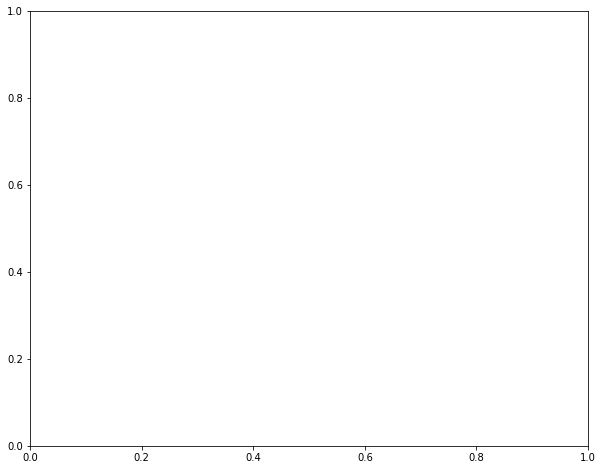

In [17]:
alpha_params = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
#alpha_params = [0.01, 0.02]
colors = ["red", "green", "blue", "gray", "#656522", "#12FF14", "#B0B0B0", "#AA0505", "#0145FF", "#670566"]
#pointtypes = ['o', '^']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '--', '-.']

fig_roc = plt.figure(1, figsize=(10, 8))
ax_roc = fig_roc.add_subplot(1, 1, 1)

for param,col,ls in zip(alpha_params, colors, linestyles):
    
    clf_pipe = pipeline.Pipeline([
        ('vect', tfidf),
        ('clf', MultinomialNB(alpha=param))
    ])

    cv = cross_validation.StratifiedKFold(y_train, n_folds=5)
    
    auc_res = 0
    xr = np.linspace(0, 1, 100)
    tpr_interp = np.zeros(shape=xr.shape, dtype=float)
    
    for i, (train_inx, test_inx) in enumerate(cv):
        model = clf_pipe.fit(data_train[train_inx], y_train[train_inx])
        pred = model.predict_proba(data_train[test_inx])
        
        fpr, tpr, thresh = metrics.roc_curve(y_train[test_inx], pred[:, 1])
        auc_res += metrics.auc(fpr, tpr)
        
        tpr_interp += scipy.interp(xr, fpr, tpr)

    current_time = datetime.datetime.now().time().isoformat()
    print("Alpha = %.2f   ---->   AUC = %.4f     (%s)" %(param, auc_res/len(cv), current_time))
    
    tpr_interp /= len(cv)
    line_new = plt.plot(xr, tpr_interp)
    plt.setp(line_new, color=col, linewidth=3, linestyle=ls)
    

plt.plot([0, 1], [0, 1], '--', lw=4, color='gray')

plt.setp(ax_roc.get_xticklabels(), rotation='horizontal', fontsize=16)
plt.setp(ax_roc.get_yticklabels(), rotation='vertical', fontsize=16)
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.title('Multinomial NB Classification using TF-IDF Features', size=20)
plt.legend(alpha_params, loc='lower right', fontsize=20)
plt.show()

In [18]:
clf_pipe = pipeline.Pipeline([
    ('vect', tfidf),
    ('clf', MultinomialNB(alpha=2.0))
])

final_model = clf_pipe.fit(data_train, y_train)
#pred_multNB = final_model.predict_proba(data_test)

pred_multNB = final_model.predict(data_test)

pred_multNB = np.vstack((df_test.loc[:, 'id'], pred_multNB)).T

print(pred_multNB.shape)

#np.savetxt('../results/pred.multinomialNB.alpha_optimized.csv', pred_multNB, fmt='%s,%1d', delimiter=',', header='id,labels')

(25000, 2)


In [19]:
pred_multNB

array([[98481,     1],
       [88606,     1],
       [88639,     1],
       ...,
       [97410,     1],
       [84907,     0],
       [99798,     0]], dtype=int64)

In [28]:
sub = pd.DataFrame(pred_multNB,columns = ['id','labels'])

In [30]:
sub.to_csv('submission_2.csv', index=False)

In [29]:
sub

,id,labels
0,98481,1
1,88606,1
2,88639,1
3,76170,0
4,81803,0
5,93371,1
6,87360,0
7,88547,1
8,88215,1
9,96187,1
